In [1]:
import numpy as np
from scipy.optimize import minimize

# Define the function to be minimized
def f(w):
    e = np.arange(1, 61)  # e_t values from 1 to 60
    return np.sum(e**2)

# Define the constraint that w1 + w2 + w3 = 1 for all t
def constraint(w):
    return np.sum(w) - 1

# Define the initial weights
w0 = np.random.rand(3)

# Define the bounds for each weight (between 0 and 1)
bounds = [(0, 1) for _ in range(3)]

# Perform the optimization
result = minimize(f, w0, method='SLSQP', bounds=bounds, constraints={'type':'eq', 'fun': constraint})

# Extract the optimized weights
w_optimized = result.x

# Calculate S
S = np.sum(w_optimized)

# Calculate the new weights x
x = w_optimized / S

# Print the results
print("Optimized weights (w):", w_optimized)
print("S:", S)
print("New weights (x):", x)


Optimized weights (w): [0.54555192 0.11344662 0.34100147]
S: 0.9999999999999997
New weights (x): [0.54555192 0.11344662 0.34100147]


In [1]:
import numpy as np

# Define the function f(w) and the constraint function
def f(w):
    e = np.arange(1, 61)
    return np.sum(e**2)

def constraint(w):
    return np.sum(w) - 1

# Initialize variables
w = np.random.rand(3, 60)  # Random initialization of w
delta = 0.0001
k = 0

# Pattern Search Algorithm
while True:
    # (a) Increase each w
    w_new = w + delta
    w_new = w_new / np.sum(w_new, axis=0)

    if f(w_new) < f(w):
        w = w_new
        k += 1
        delta = delta / 2
        continue

    # (b) Decrease each w
    w_new = w - delta
    w_new = w_new / np.sum(w_new, axis=0)

    if f(w_new) < f(w):
        w = w_new
        k += 1
        delta = delta / 2
        continue

    # (c) Increase and decrease alternately
    for t in range(60):
        w_new = w.copy()
        if t % 2 == 0:
            w_new[:, t] = w_new[:, t] + delta
        else:
            w_new[:, t] = w_new[:, t] - delta

        w_new = w_new / np.sum(w_new, axis=0)

        if f(w_new) < f(w):
            w = w_new
            k += 1
            delta = delta / 2
            break
    else:
        # (d) Decrease and increase alternately
        for t in range(60):
            w_new = w.copy()
            if t % 2 == 0:
                w_new[:, t] = w_new[:, t] - delta
            else:
                w_new[:, t] = w_new[:, t] + delta

            w_new = w_new / np.sum(w_new, axis=0)

            if f(w_new) < f(w):
                w = w_new
                k += 1
                delta = delta / 2
                break
        else:
            # (e) Modified (a)
            for t in range(60):
                w_new = w.copy()
                w_new[0, t] = w_new[0, t] + delta
                w_new[1, t] = w_new[1, t] - delta
                w_new[2, t] = w_new[2, t] + delta

                w_new = w_new / np.sum(w_new, axis=0)

                if f(w_new) < f(w):
                    w = w_new
                    k += 1
                    delta = delta / 2
                    break
            else:
                # (f) Modified (b)
                for t in range(60):
                    w_new = w.copy()
                    w_new[0, t] = w_new[0, t] - delta
                    w_new[1, t] = w_new[1, t] + delta
                    w_new[2, t] = w_new[2, t] - delta

                    w_new = w_new / np.sum(w_new, axis=0)

                    if f(w_new) < f(w):
                        w = w_new
                        k += 1
                        delta = delta / 2
                        break
                else:
                    break

    # Termination condition (you may define your own)
    if k > 100:
        break

# Final optimized w
print("Optimized weights (w):", w)


Optimized weights (w): [[0.27121959 0.22913686 0.65335806 0.66744611 0.05493714 0.17374793
  0.59461453 0.24174195 0.72337013 0.41631224 0.71312848 0.34608627
  0.684417   0.31730479 0.11101338 0.37371257 0.2847557  0.63812254
  0.63288227 0.54342182 0.89187807 0.96826201 0.11827369 0.12744872
  0.33136988 0.15691154 0.90747993 0.37275486 0.52412392 0.0092303
  0.690501   0.335348   0.5748146  0.19748127 0.3624472  0.28213726
  0.53186887 0.62247368 0.3579704  0.43212607 0.67827956 0.10100346
  0.3930009  0.84455584 0.70686259 0.91356893 0.95411641 0.59622686
  0.72342883 0.50313501 0.55684842 0.21700423 0.33634652 0.92712176
  0.55772026 0.8371805  0.25436532 0.09601461 0.49172393 0.90669018]
 [0.64167528 0.49581893 0.59036489 0.85381123 0.77739945 0.64685542
  0.69714654 0.71001057 0.83066198 0.58666774 0.05865063 0.79366844
  0.97948065 0.90560388 0.96157623 0.84076536 0.76698351 0.37187141
  0.96343011 0.44721605 0.30619259 0.84133398 0.26405074 0.58435152
  0.1002667  0.4237322  0

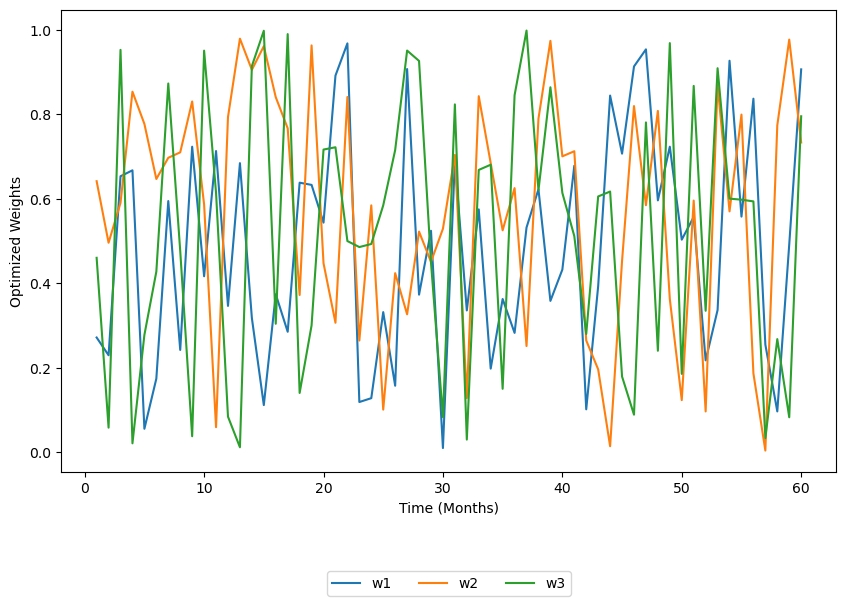

In [2]:
import matplotlib.pyplot as plt, numpy as np

# Assuming you have the optimized weights stored in the variable 'w'
# 'w' should be a 2D array with shape (3, 60) where each column represents a time step

# Define time steps
time_steps = np.arange(1, 61)

# Plot the optimized weights for each time step
plt.figure(figsize=(10, 6))

for i in range(3):
    plt.plot(time_steps, w[i], label=f'w{i+1}')

plt.xlabel('Time (Months)')
plt.ylabel('Optimized Weights')

plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2),ncol = 3)
plt.grid(False)
plt.show()


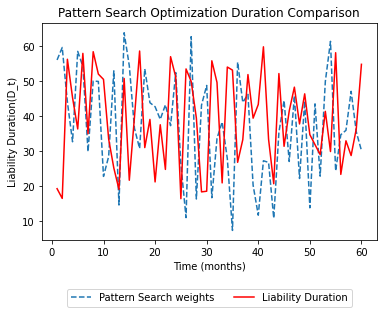

In [8]:
import matplotlib.pyplot as plt
import random

# Provided data
#weights = ([0.3877053, 0.70576182, 0.07721024])
weights = [([0.82070076, 0.52787261, 0.90702875]), (0.03517073, 0.83745989, 0.99065267),
           (0.58293693, 0.26247929, 0.86344131), (0.03082162, 0.16698454, 0.79061585),
           (0.59954538, 0.7960824, 0.8167251), (0.5464872, 0.66302641, 0.82389496),
           (0.24928707, 0.17213702, 0.63588584), (0.44454882, 0.90173766, 0.53076968),
           (0.40895972, 0.46719047, 0.91128608), (0.55782002, 0.53255294, 0.02565887),
           (0.67125899, 0.68894147, 0.02030056), (0.53445895, 0.96727075, 0.52939282),
           (0.00384243, 0.43516265, 0.04745546), (0.15173809, 0.99433718, 0.94061389),
           (0.9014026, 0.912796, 0.50330625), (0.13573982, 0.84760654, 0.2836837),
           (0.35981855, 0.1554817, 0.64156181), (0.94449928, 0.33851837, 0.95685177),
           (0.18854955, 0.75814858, 0.55534232), (0.63498125, 0.39341944, 0.69520572),
           (0.73372686, 0.47741469, 0.48800968), (0.23188018, 0.24805493, 0.96224043),
           (0.61702478, 0.6317477, 0.34008372), (0.8147038, 0.98036657, 0.41574347),
           (0.34691646, 0.49503287, 0.22263729), (0.63167243, 0.03458224, 0.09031016),
           (0.441372, 0.87708222, 0.91834794), (0.53023599, 0.30940753, 0.03963422),
           (0.57479699, 0.28406416, 0.82147977), (0.82210129, 0.51215006, 0.70981693),
           (0.17510107, 0.21251226, 0.2448472), (0.04356324, 0.94418469, 0.14629845),
           (0.5391998, 0.4172813, 0.57907043), (0.3877053, 0.70576182, 0.07721024),
           (0.04083183, 0.213657, 0.01663834), (0.57430279, 0.58521901, 0.91669743),
           (0.41090922, 0.23899881, 0.93380981), (0.72195791, 0.83425115, 0.39117996),
           (0.22561537, 0.52521533, 0.06399067), (0.41098241, 0.10731189, 0.11736501),
           (0.36525615, 0.75520082, 0.02394465), (0.70829258, 0.04125862, 0.51541221),
           (0.29398922, 0.10577664, 0.13055215), (0.57286627, 0.58168814, 0.34175897),
           (0.13100619, 0.36141307, 0.93259609), (0.50728109, 0.05711232, 0.57285576),
           (0.58588099, 0.49043034, 0.71639369), (0.14055784, 0.68289426, 0.01048204),
           (0.47005671, 0.51159539, 0.69221435), (0.05660573, 0.43760265, 0.00589064),
           (0.8566083, 0.84609421, 0.26034324), (0.42921198, 0.38341459, 0.19633293),
           (0.96428745, 0.83283623, 0.42204069), (0.82320129, 0.77116145, 0.85065882),
           (0.8395229, 0.4905925, 0.0185529), (0.03868997, 0.27140762, 0.75650139),
           (0.96363, 0.4656982, 0.33540437), (0.65561725, 0.25113489, 0.93785518),
           (0.65181401, 0.71616704, 0.20589692), (0.14321223, 0.33018248, 0.54313565)]
T_Z1 = 10.9
T_Z2 = 29.8
T_Z3 = 34.7

D_t = [random.uniform(15, 60) for i in range(60)]

# Calculate w1(t)*T(Z1) + w2(t)*T(Z2) + w3(t)*T(Z3) for each t
result = [sum(weights[i][j] * [T_Z1, T_Z2, T_Z3][j] for j in range(3)) for i in range(60)]

# Create the plot
# plt.plot(result, D_t)
plt.plot(range(1, 61), result,linestyle='--', label='Pattern Search weights')
plt.plot(range(1, 61), D_t, color='red', label='Liability Duration')
plt.xlabel('Time (months)')
plt.ylabel('Liability Duration(D_t)')
plt.title('Pattern Search Optimization Duration Comparison')
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2),ncol = 3)
plt.show()
